In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = 'Data.csv'  # Replace with the actual path to your dataset
data1 = pd.read_csv(file_path)

In [ ]:
data1.head()

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Warehouse id  1039 non-null   object
 1   Region        1039 non-null   object
 2   SKU id        1039 non-null   object
 3   Apr-18        1039 non-null   int64 
 4   May-18        1039 non-null   int64 
 5   Jun-18        1039 non-null   int64 
 6   Jul-18        1039 non-null   int64 
 7   Aug-18        1039 non-null   int64 
 8   Sep-18        1039 non-null   int64 
 9   Oct-18        1039 non-null   int64 
 10  Nov-18        1039 non-null   int64 
 11  Dec-18        1039 non-null   int64 
 12  Jan-19        1039 non-null   int64 
 13  Feb-19        1039 non-null   int64 
 14  Mar-19        1039 non-null   int64 
 15  Apr-19        1039 non-null   int64 
 16  May-19        1039 non-null   int64 
 17  Jun-19        1039 non-null   int64 
 18  Jul-19        1039 non-null   int64 
 19  Aug-19

In [ ]:
data1['Region'].value_counts()

,count
Region,
WEST,308
SOUTH,286
NORTH,233
EAST,212


In [ ]:
data1.shape


(1039, 41)

In [ ]:
# Check for NaN values in the entire DataFrame
nan_values = data1.isna().sum()
print("NaN values per column:\n", nan_values)

# Check for 'na' values (assuming they are strings)
na_values = data1.isin(['na']).sum()
print("\n'na' values per column:\n", na_values)

NaN values per column:
 Warehouse id    0
Region          0
SKU id          0
Apr-18          0
May-18          0
Jun-18          0
Jul-18          0
Aug-18          0
Sep-18          0
Oct-18          0
Nov-18          0
Dec-18          0
Jan-19          0
Feb-19          0
Mar-19          0
Apr-19          0
May-19          0
Jun-19          0
Jul-19          0
Aug-19          0
Sep-19          0
Oct-19          0
Nov-19          0
Dec-19          0
Jan-20          0
Feb-20          0
Mar-20          0
Apr-20          0
May-20          0
Jun-20          0
Jul-20          0
Aug-20          0
Sep-20          0
Oct-20          0
Nov-20          0
Dec-20          0
Jan-21          0
Feb-21          0
Mar-21          0
Apr-21          0
May-21          0
dtype: int64

'na' values per column:
 Warehouse id    0
Region          0
SKU id          0
Apr-18          0
May-18          0
Jun-18          0
Jul-18          0
Aug-18          0
Sep-18          0
Oct-18          0
Nov-18          0
D

In [ ]:
# Load the dataset
file_path = 'Data.csv'  # Replace with the actual path to your dataset
data2 = pd.read_csv(file_path)

In [ ]:
# Reshape the dataset to long format for easier analysis
data_long = data2.melt(
    id_vars=["Warehouse id", "Region", "SKU id"],
    var_name="Month",
    value_name="Sales"
)

In [ ]:
# Convert the 'Month' column to datetime format
data_long["Month"] = pd.to_datetime(data_long["Month"], format='%b-%y')

<ipython-input-7-a6a479ef11f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


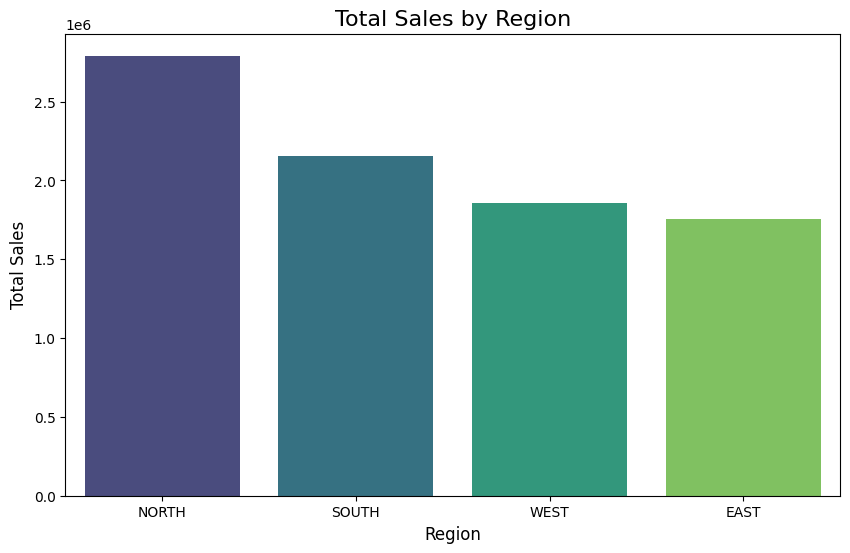

In [ ]:
# --- Visualization 1: Total Sales by Region ---
region_sales = data_long.groupby("Region")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Total Sales by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

<ipython-input-23-78e7163c9cbc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sku_sales.values, y=sku_sales.index, palette="magma")


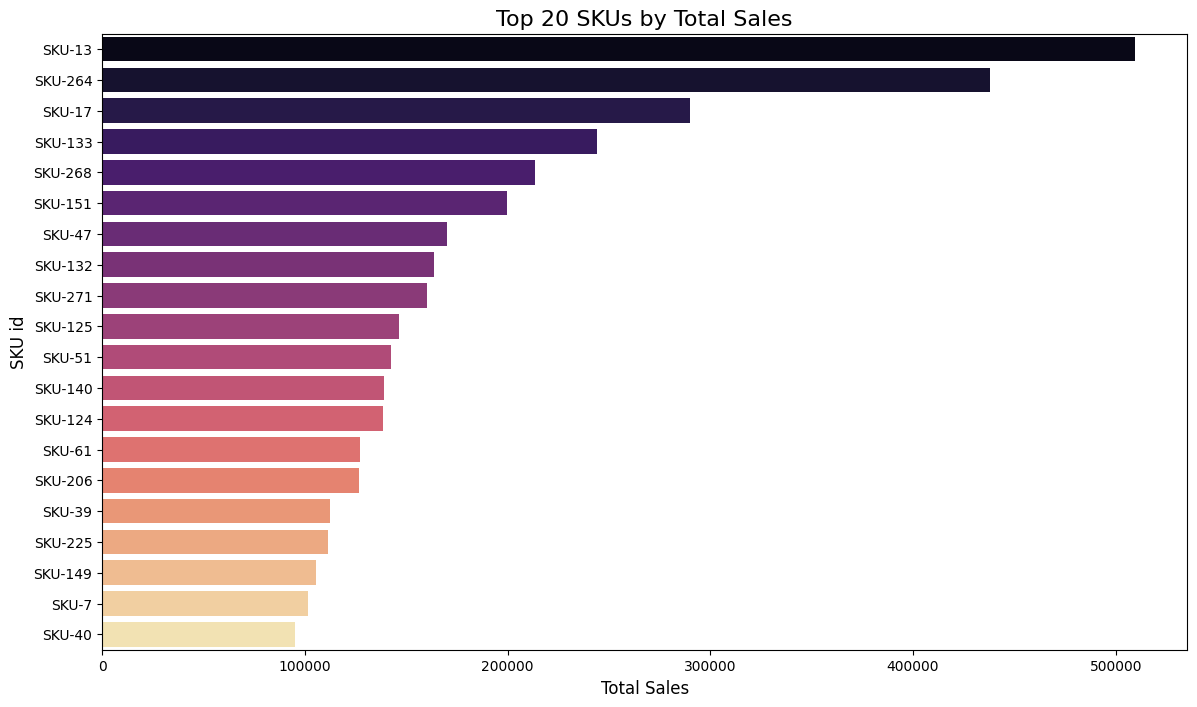

In [ ]:
# --- Visualization 2: Total Sales by SKU ---
sku_sales = data_long.groupby("SKU id")["Sales"].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x=sku_sales.values, y=sku_sales.index, palette="magma")
plt.title("Top 20 SKUs by Total Sales", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("SKU id", fontsize=12)
plt.show()


<ipython-input-24-d68cb4ecfc7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_long, x="Region", y="Sales", palette="Set3")


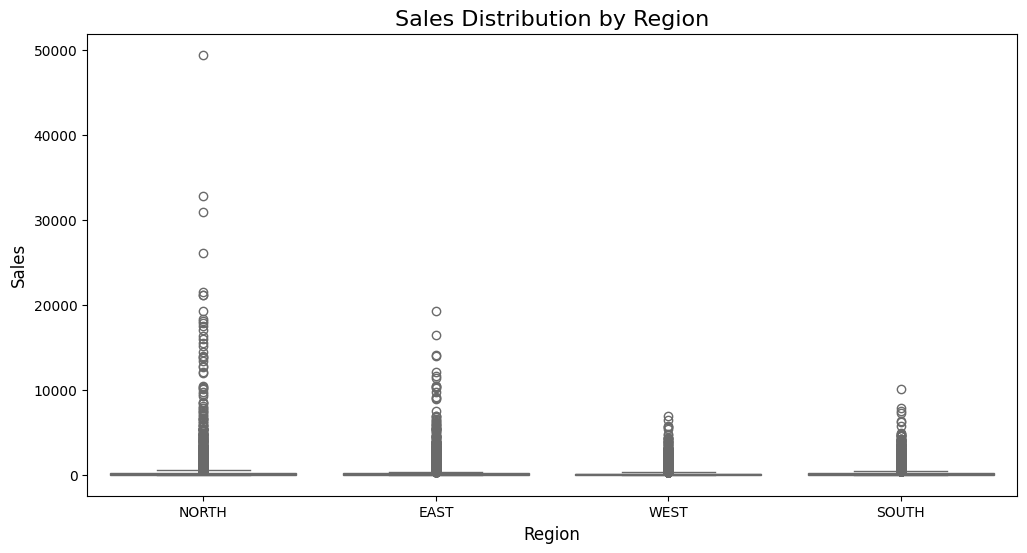

In [ ]:
# --- Visualization 3: Sales Distribution by Region ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_long, x="Region", y="Sales", palette="Set3")
plt.title("Sales Distribution by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

<ipython-input-26-e8d476e86ed9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_long, x="Month", y="Sales", ci=None, label="Overall Sales")


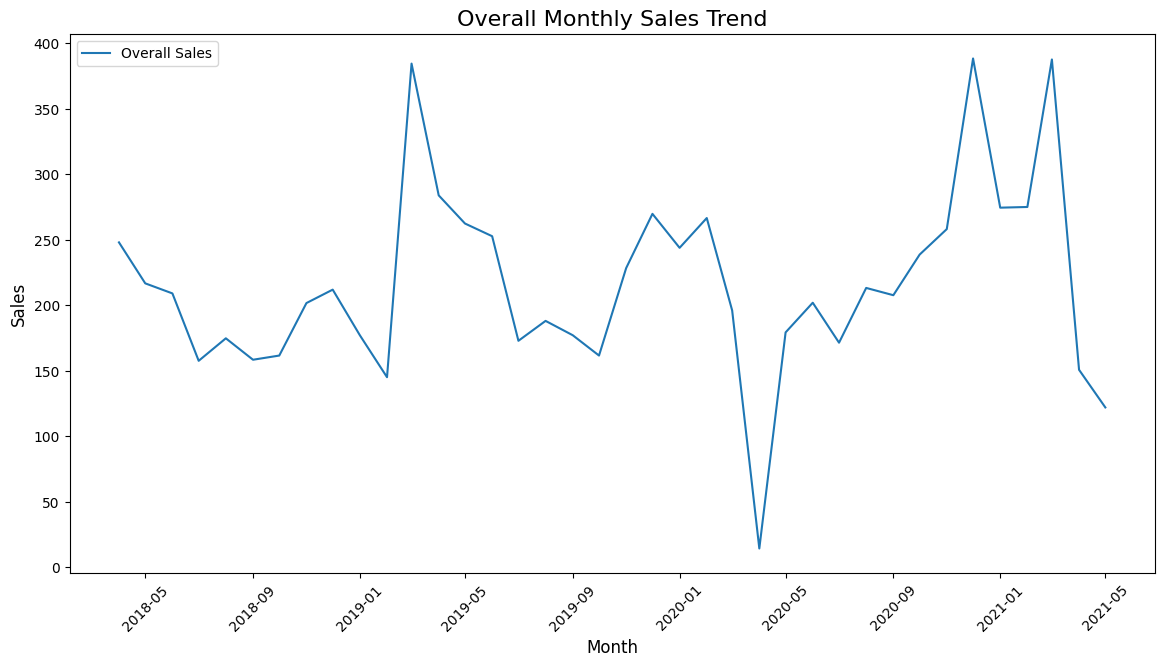

In [ ]:
# --- Visualization 5: Time-series Sales Trends ---
# Overall sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_long, x="Month", y="Sales", ci=None, label="Overall Sales")
plt.title("Overall Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-7f74c98021c8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_long, x="Month", y="Sales", hue="Region", ci=None)


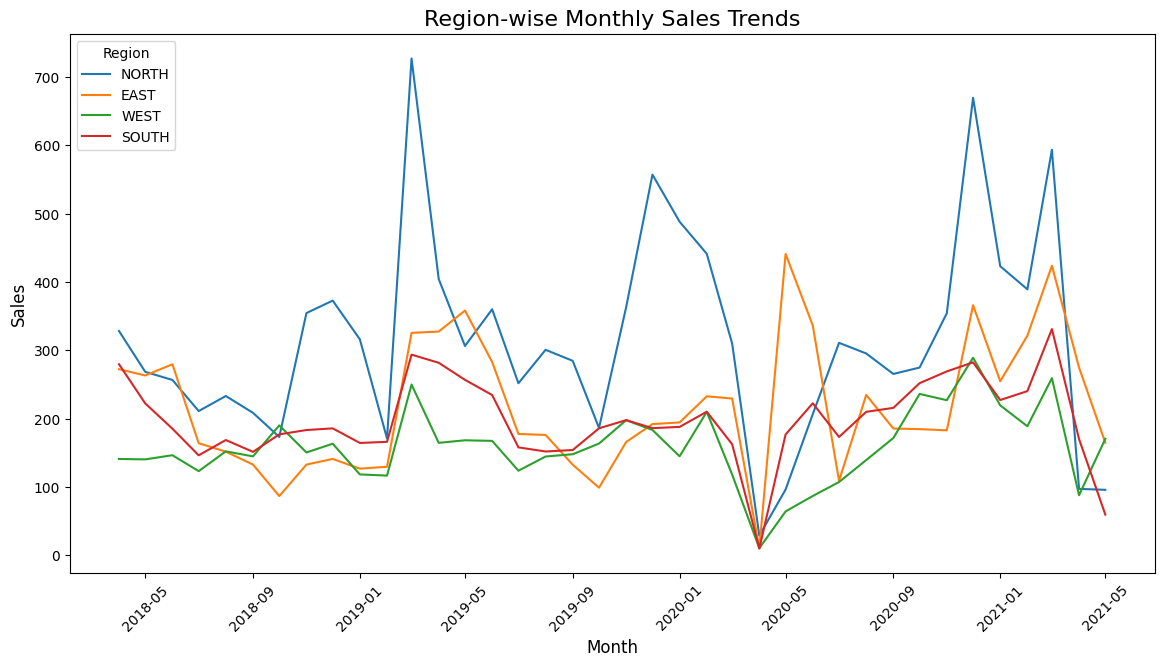

In [ ]:
# Region-wise sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_long, x="Month", y="Sales", hue="Region", ci=None)
plt.title("Region-wise Monthly Sales Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.show()


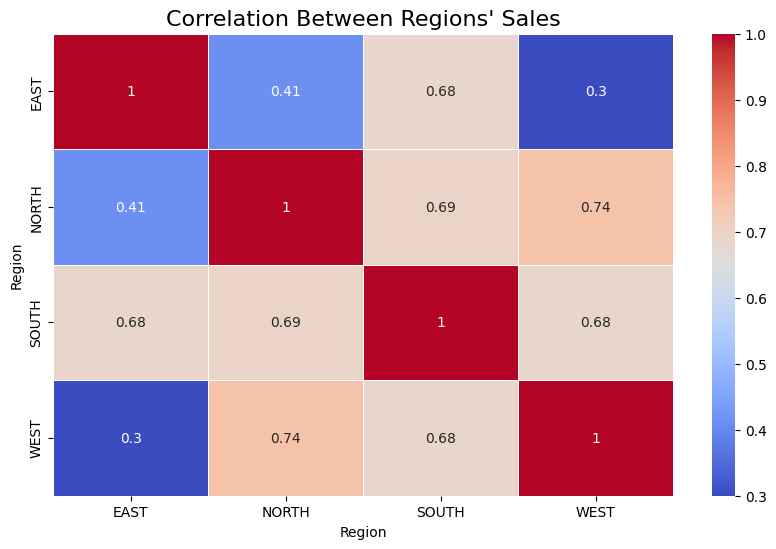

In [ ]:
# Pivot the dataset for heatmap analysis
pivot_data = data_long.pivot_table(index="Month", columns="Region", values="Sales", aggfunc="sum").fillna(0)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Regions' Sales", fontsize=16)
plt.show()

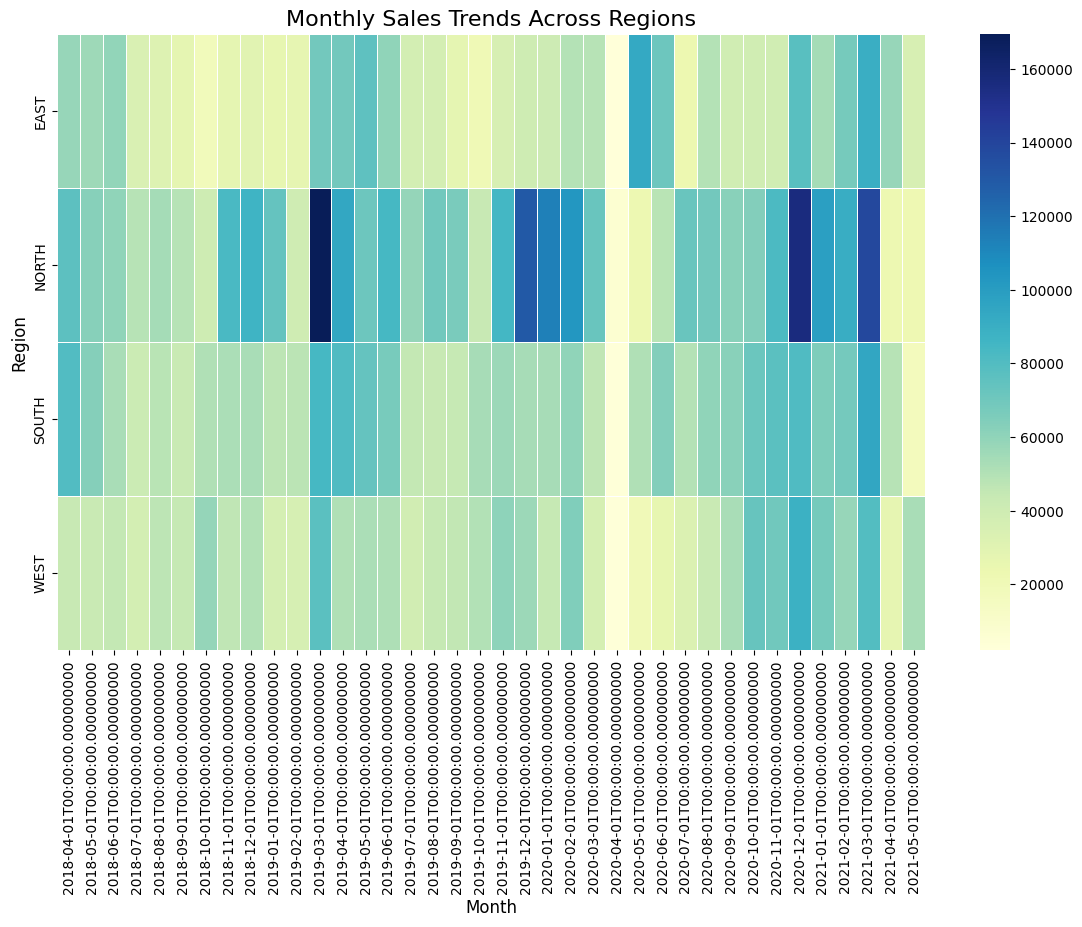

In [ ]:
# Monthly sales trends heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data.T, annot=False, cmap="YlGnBu", linewidths=0.5)
plt.title("Monthly Sales Trends Across Regions", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()

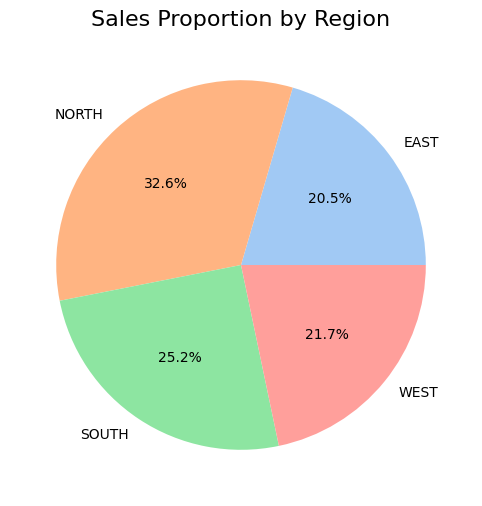

In [ ]:
# Sales proportion by Region
region_sales_prop = data_long.groupby("Region")["Sales"].sum() / data_long["Sales"].sum()

plt.figure(figsize=(8, 6))
region_sales_prop.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Sales Proportion by Region", fontsize=16)
plt.ylabel("")  # Remove default ylabel
plt.show()

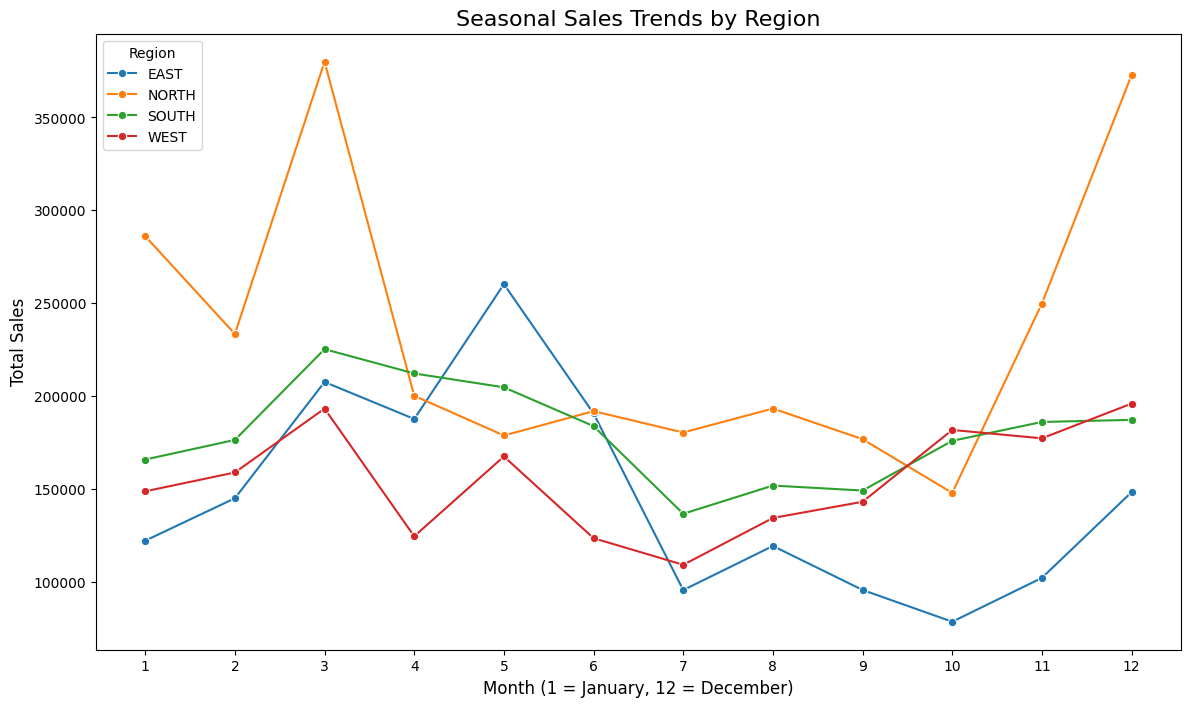

In [ ]:
# Extract month and year for seasonal trend analysis
data_long["Year"] = data_long["Month"].dt.year
data_long["Month_Num"] = data_long["Month"].dt.month
monthly_sales = data_long.groupby(["Month_Num", "Region"])["Sales"].sum().reset_index()

# Line plot for seasonal trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x="Month_Num", y="Sales", hue="Region", marker="o", palette="tab10")
plt.title("Seasonal Sales Trends by Region", fontsize=16)
plt.xlabel("Month (1 = January, 12 = December)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="Region")
plt.show()

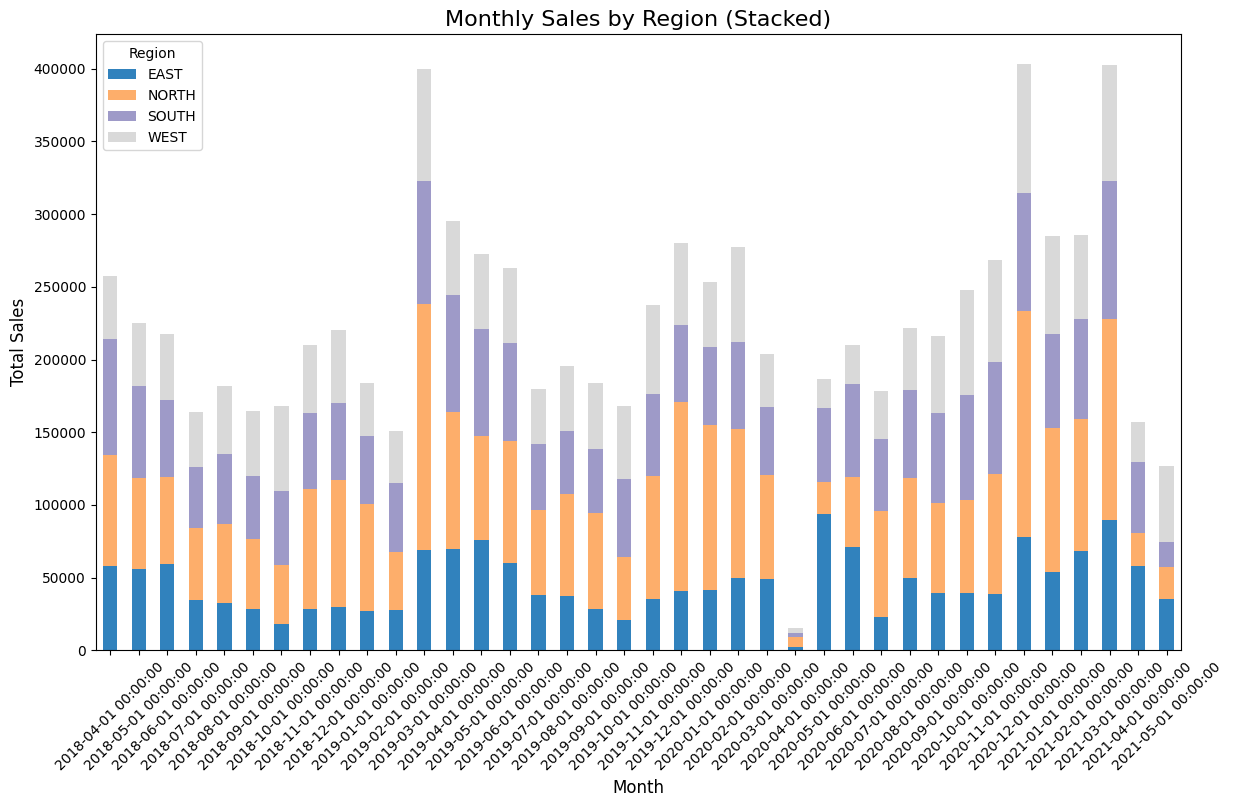

In [ ]:
# Group sales by Month and Region
monthly_region_sales = data_long.groupby(["Month", "Region"])["Sales"].sum().unstack()

# Stacked bar chart for monthly sales by region
monthly_region_sales.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20c")
plt.title("Monthly Sales by Region (Stacked)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

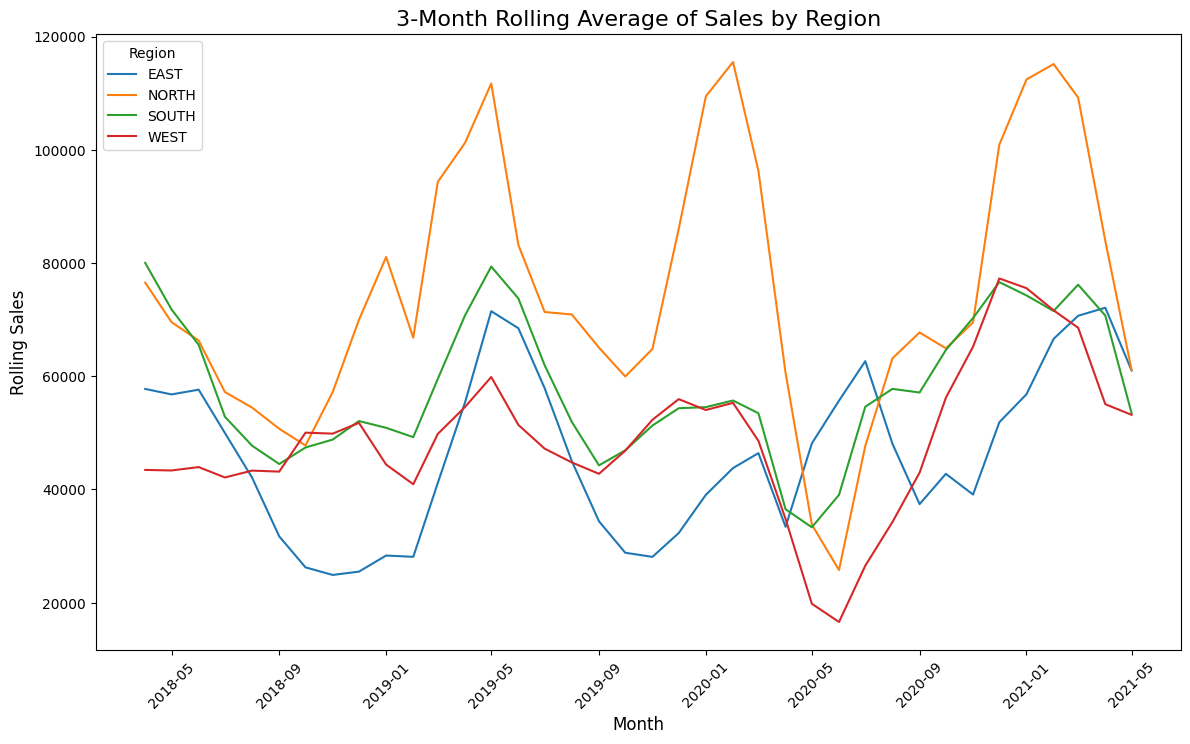

In [ ]:
# Calculate rolling average for each region
rolling_data = data_long.groupby(["Region", "Month"])["Sales"].sum().reset_index()
rolling_data["Rolling Sales"] = rolling_data.groupby("Region")["Sales"].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

# Line plot with rolling average
plt.figure(figsize=(14, 8))
sns.lineplot(data=rolling_data, x="Month", y="Rolling Sales", hue="Region", palette="tab10")
plt.title("3-Month Rolling Average of Sales by Region", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Rolling Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()


<ipython-input-34-074ed27760d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_long, x="Region", y="Sales", palette="muted")


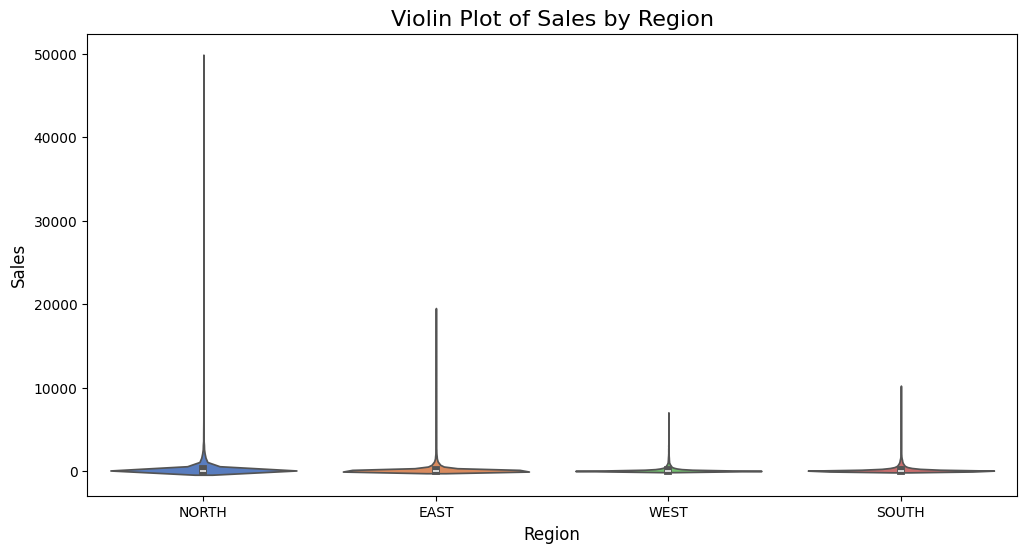

In [ ]:
# Violin plot for sales by Region
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_long, x="Region", y="Sales", palette="muted")
plt.title("Violin Plot of Sales by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()


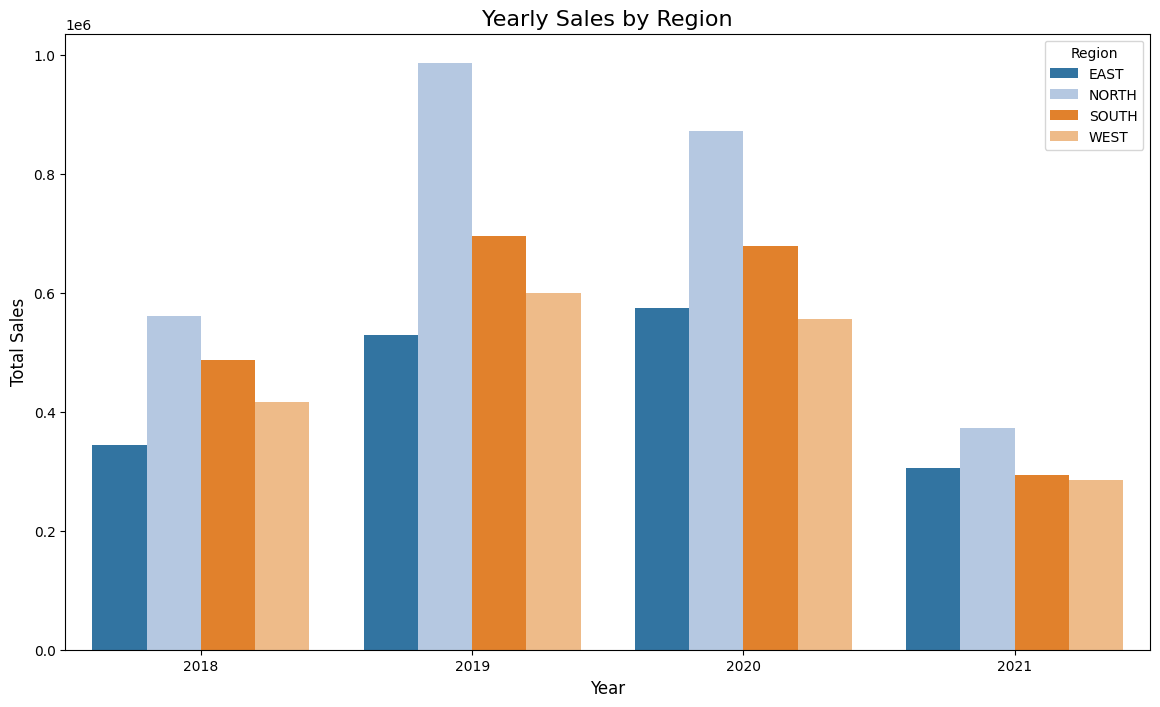

In [ ]:
# Group by year and region
yearly_sales = data_long.groupby(["Year", "Region"])["Sales"].sum().reset_index()

# Bar chart for yearly sales by region
plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_sales, x="Year", y="Sales", hue="Region", palette="tab20")
plt.title("Yearly Sales by Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Region")
plt.show()

In [ ]:
# Load the temperature data
temp_data = pd.DataFrame({
    "Date": [
        "01-04-2018", "01-05-2018", "01-06-2018", "01-07-2018", "01-08-2018", "01-09-2018",
        "01-10-2018", "01-11-2018", "01-12-2018", "01-01-2019", "01-02-2019", "01-03-2019",
        "01-04-2019", "01-05-2019", "01-06-2019", "01-07-2019", "01-08-2019", "01-09-2019",
        "01-10-2019", "01-11-2019", "01-12-2019", "01-01-2020", "01-02-2020", "01-03-2020",
        "01-04-2020", "01-05-2020", "01-06-2020", "01-07-2020", "01-08-2020", "01-09-2020",
        "01-10-2020", "01-11-2020", "01-12-2020", "01-01-2021", "01-02-2021", "01-03-2021",
        "01-04-2021", "01-05-2021"
    ],
    "Temp": [
        28, 30, 31, 30, 30, 30, 28, 25, 20, 19, 22, 26, 29, 30, 31, 30, 30, 29, 28, 25, 20,
        19, 21, 26, 28, 29, 30, 30, 30, 30, 29, 25, 20, 21, 23, 30, 31, 30
    ]
})

# Convert Date to datetime format
temp_data["Date"] = pd.to_datetime(temp_data["Date"], format="%d-%m-%Y")

# Aggregate the sales data by month
sales_by_month = data_long.groupby("Month")["Sales"].sum().reset_index()

# Merge temperature data with sales data
merged_data = pd.merge(sales_by_month, temp_data, left_on="Month", right_on="Date")
merged_data = merged_data.drop("Date", axis=1)

In [ ]:
print(merged_data.head())

       Month   Sales  Temp
0 2018-04-01  257779    28
1 2018-05-01  225281    30
2 2018-06-01  217311    31
3 2018-07-01  163865    30
4 2018-08-01  181704    30


In [ ]:
merged_data.shape

(38, 3)

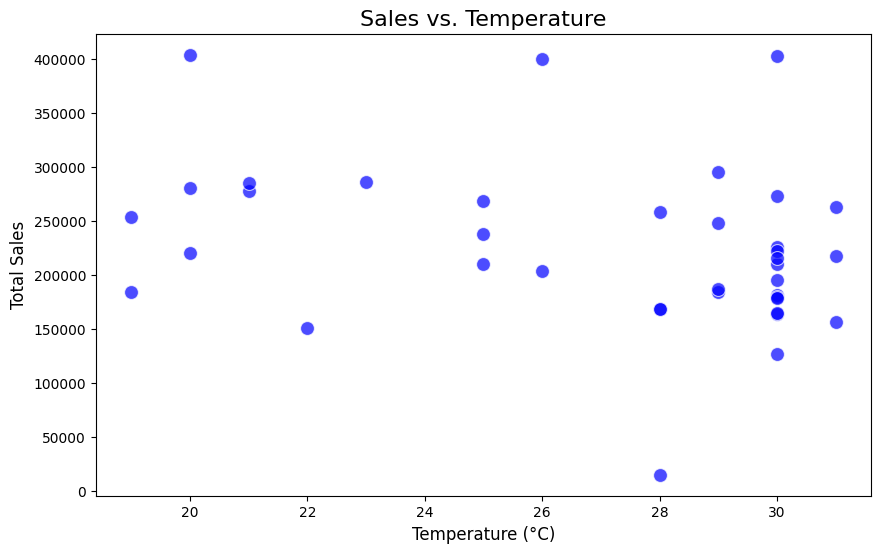

In [ ]:
# Scatter plot for sales vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="Temp", y="Sales", color="blue", s=100, alpha=0.7)
plt.title("Sales vs. Temperature", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()


<ipython-input-40-568aeb7ff891>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x="Temp Range", y="Sales", palette="Set2")


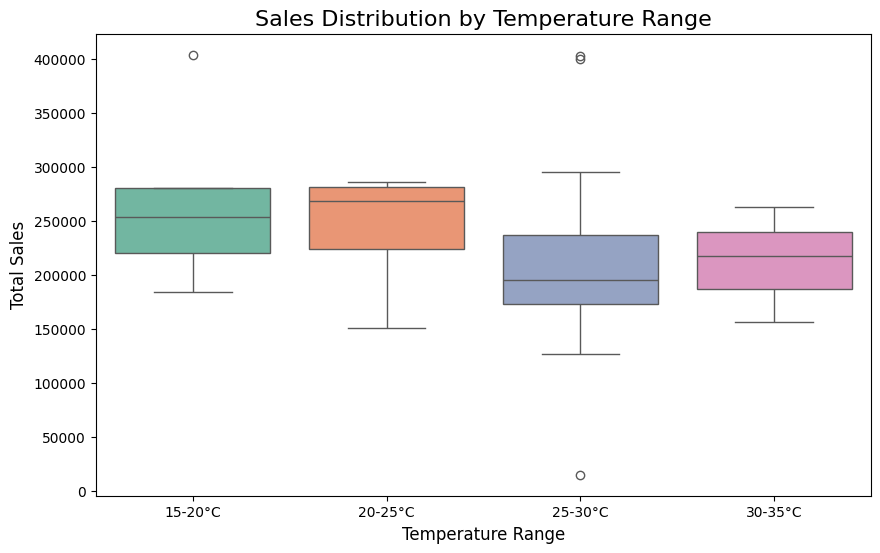

In [ ]:
# Categorize temperature into bins
merged_data["Temp Range"] = pd.cut(merged_data["Temp"], bins=[15, 20, 25, 30, 35], labels=["15-20°C", "20-25°C", "25-30°C", "30-35°C"])

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x="Temp Range", y="Sales", palette="Set2")
plt.title("Sales Distribution by Temperature Range", fontsize=16)
plt.xlabel("Temperature Range", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

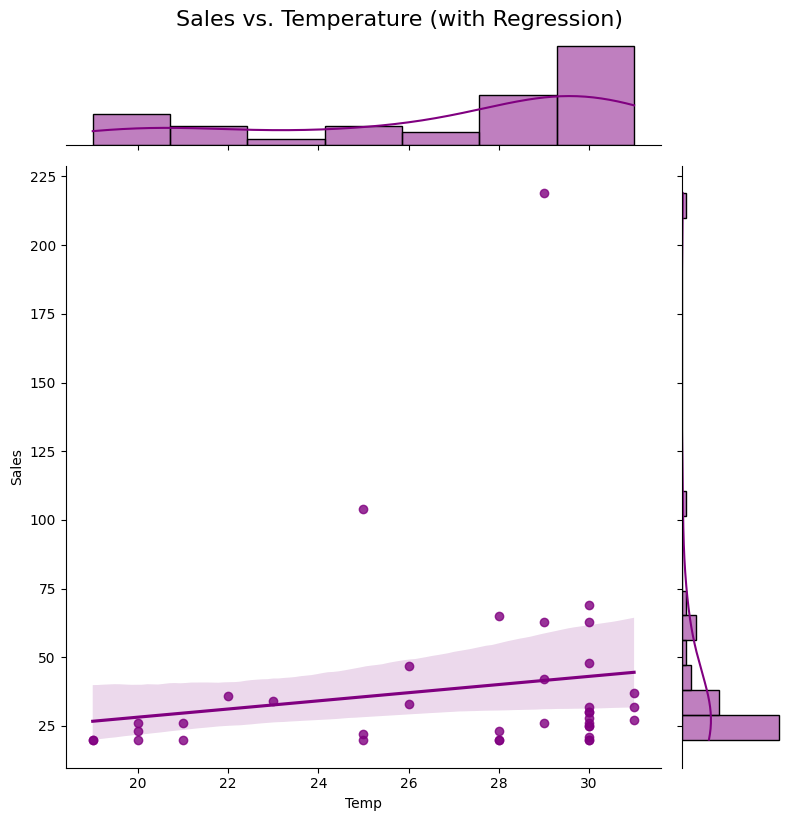

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path accordingly)
data = pd.read_csv('Final East Data.csv')

# Flatten the DataFrame (if necessary)
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data = data.reset_index()  # If it's multi-indexed, flatten it

# Ensure the 'Temp' and 'Sales' columns are available
# You might need to adjust based on actual column names
data['Sales'] = data['SKU-1'] + data['SKU-2'] + data['SKU-3']  # Example, adjust according to your needs

# Create a jointplot with regression
sns.jointplot(data=data, x="Temp", y="Sales", kind="reg", height=8, color="purple")

# Add a title
plt.suptitle("Sales vs. Temperature (with Regression)", y=1.02, fontsize=16)

plt.show()

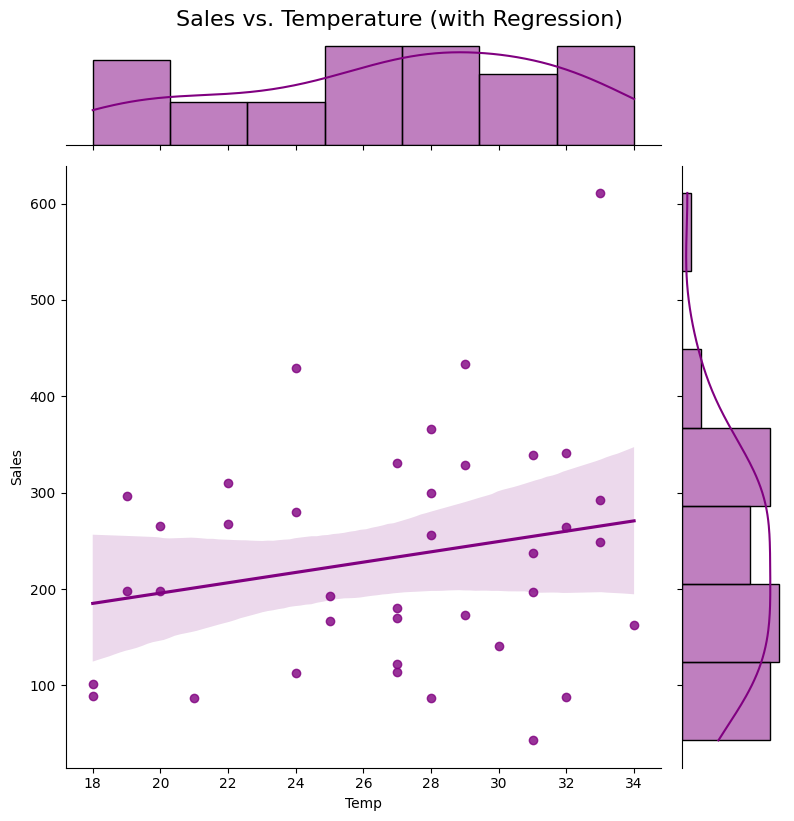

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path accordingly)
data = pd.read_csv('Final West Data.csv')

# Flatten the DataFrame (if necessary)
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data = data.reset_index()  # If it's multi-indexed, flatten it

# Ensure the 'Temp' and 'Sales' columns are available
# You might need to adjust based on actual column names
data['Sales'] = data['SKU-1'] + data['SKU-2'] + data['SKU-3']  # Example, adjust according to your needs

# Create a jointplot with regression
sns.jointplot(data=data, x="Temp", y="Sales", kind="reg", height=8, color="purple")

# Add a title
plt.suptitle("Sales vs. Temperature (with Regression)", y=1.02, fontsize=16)

plt.show()


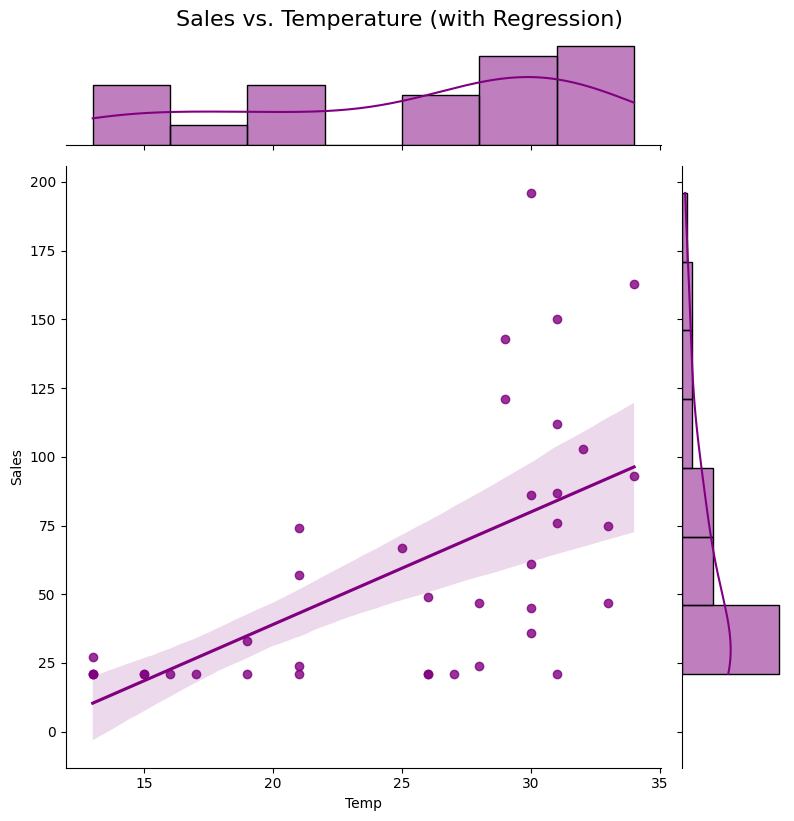

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path accordingly)
data = pd.read_csv('Final North Data.csv')

# Flatten the DataFrame (if necessary)
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data = data.reset_index()  # If it's multi-indexed, flatten it

# Ensure the 'Temp' and 'Sales' columns are available
# You might need to adjust based on actual column names
data['Sales'] = data['SKU-1'] + data['SKU-2'] + data['SKU-3']  # Example, adjust according to your needs

# Create a jointplot with regression
sns.jointplot(data=data, x="Temp", y="Sales", kind="reg", height=8, color="purple")

# Add a title
plt.suptitle("Sales vs. Temperature (with Regression)", y=1.02, fontsize=16)

plt.show()

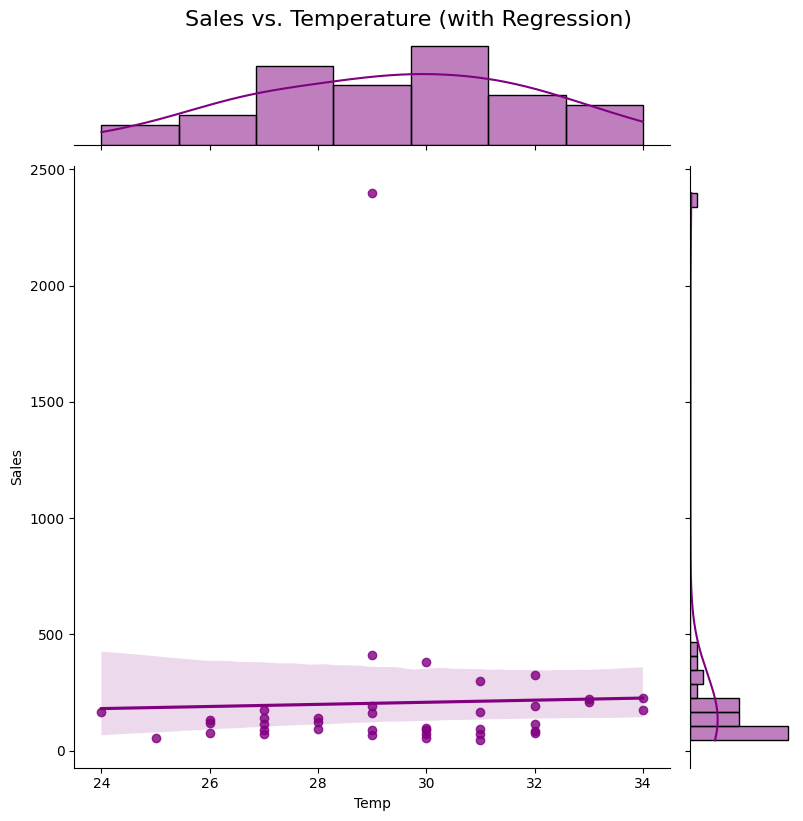

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the file path accordingly)
data = pd.read_csv('Final South Data.csv')

# Flatten the DataFrame (if necessary)
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data = data.reset_index()  # If it's multi-indexed, flatten it

# Ensure the 'Temp' and 'Sales' columns are available
# You might need to adjust based on actual column names
data['Sales'] = data['SKU-1'] + data['SKU-2'] + data['SKU-3']  # Example, adjust according to your needs

# Create a jointplot with regression
sns.jointplot(data=data, x="Temp", y="Sales", kind="reg", height=8, color="purple")

# Add a title
plt.suptitle("Sales vs. Temperature (with Regression)", y=1.02, fontsize=16)

plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Load the dataset
data = pd.read_csv("Data.csv")

In [13]:
# Feature Engineering: Add lag features and moving averages
def create_features(data, n_lags=3, moving_avg_periods=[3, 6]):
    feature_data = data.copy()
    for lag in range(1, n_lags + 1):
        feature_data[f'Lag_{lag}'] = feature_data.iloc[:, -lag-1]
    for period in moving_avg_periods:
        feature_data[f'MA_{period}'] = feature_data.iloc[:, -period:].mean(axis=1)
    return feature_data

In [14]:
# Extract sales data and add features
sales_data = data.iloc[:, 3:]  # Sales columns (Apr-18 to May-21)
enhanced_sales_data = create_features(sales_data)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
metadata = data.iloc[:, :3]
le_region = LabelEncoder()
le_sku = LabelEncoder()
metadata['Region'] = le_region.fit_transform(metadata['Region'])
metadata['SKU id'] = le_sku.fit_transform(metadata['SKU id'])

In [36]:
# Combine features with metadata
enhanced_data = pd.concat([metadata, enhanced_sales_data], axis=1)

In [37]:
# Normalize the sales data
feature_columns = enhanced_data.columns[3:]  # Exclude metadata
target_column = 'May-21'  # Last available month for prediction
X = enhanced_data[feature_columns].values
y = enhanced_data[target_column].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Prepare the data for GRU
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [39]:
# Build the GRU model
model = Sequential([
    GRU(128, activation='tanh', return_sequences=True, input_shape=(1, X_scaled.shape[2])),
    Dropout(0.3),
    GRU(64, activation='tanh'),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# Use Adam optimizer with custom learning rate
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

In [41]:
# Compile the model
model.compile(optimizer=optimizer, loss='mape')

In [42]:
# Train the model
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_scaled, y, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 99.5097
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.7036
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.1696
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.6986
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.0562
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.3690
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.8663
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.6711
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.1153
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.2122
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.0762
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.8547
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.6965
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.1016
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.8366
Epoc

In [26]:
# Generate predictions for June 2021
predictions = model.predict(X_scaled)
predictions = scaler.inverse_transform(predictions)  # Rescale predictions

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


ValueError: non-broadcastable output operand with shape (1039,1) doesn't match the broadcast shape (1039,43)

In [ ]:
###############################################

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv("Data.csv")

# Feature Engineering: Add lag features and moving averages
def create_features(data, n_lags=3, moving_avg_periods=[3, 6]):
    feature_data = data.copy()
    for lag in range(1, n_lags + 1):
        feature_data[f'Lag_{lag}'] = feature_data.iloc[:, -lag-1]
    for period in moving_avg_periods:
        feature_data[f'MA_{period}'] = feature_data.iloc[:, -period:].mean(axis=1)
    return feature_data

# Extract sales data and add features
sales_data = data.iloc[:, 3:]  # Sales columns (Apr-18 to May-21)
enhanced_sales_data = create_features(sales_data)

# Encode categorical features
metadata = data.iloc[:, :3]
le_region = LabelEncoder()
le_sku = LabelEncoder()
metadata['Region'] = le_region.fit_transform(metadata['Region'])
metadata['SKU id'] = le_sku.fit_transform(metadata['SKU id'])

# Combine features with metadata
enhanced_data = pd.concat([metadata, enhanced_sales_data], axis=1)

# Separate the target column (May-21)
feature_columns = enhanced_data.columns[3:-1]  # Exclude metadata and target
target_column = 'May-21'
X = enhanced_data[feature_columns].values
y = enhanced_data[target_column].values.reshape(-1, 1)  # Reshape for consistency

# Reshape X for GRU
X = X.reshape(X.shape[0], 1, X.shape[1])

# Build the GRU model
model = Sequential([
    GRU(128, activation='tanh', return_sequences=True, input_shape=(1, X.shape[2])),
    Dropout(0.3),
    GRU(64, activation='tanh'),
    Dropout(0.3),
    Dense(1)
])

# Use Adam optimizer with custom learning rate
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mape')

# Train the model
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X, y, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Generate predictions for June 2021
predictions = model.predict(X)  # Predictions without scaling

# Prepare the submission file
enhanced_data['Jun-21'] = predictions
submission = enhanced_data[['Warehouse id', 'Region', 'SKU id', 'Jun-21']]

# Decode the categorical features
submission['Region'] = le_region.inverse_transform(submission['Region'])
submission['SKU id'] = le_sku.inverse_transform(submission['SKU id'])

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file generated: submission.csv")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 95.0144
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.8227
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.7878
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.8167
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 76.8127
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.0790
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.1593
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.6545
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.5297
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.0667
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.3910
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.1416
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.6448
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.9824
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.6200
Epoch 16/50
33/

<ipython-input-43-3893e71934cc>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Region'] = le_region.inverse_transform(submission['Region'])
<ipython-input-43-3893e71934cc>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['SKU id'] = le_sku.inverse_transform(submission['SKU id'])


In [46]:
print(model.history.history.keys())


dict_keys([])


In [ ]:
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 99.8886 - val_loss: 93.5861
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.8741 - val_loss: 86.0246
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.6800 - val_loss: 81.2248
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.3427 - val_loss: 79.0001
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.4034 - val_loss: 77.6938
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.1043 - val_loss: 77.1589
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.6484 - val_loss: 77.6478
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.1606 - val_loss: 77.9003
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.9628 - val_loss: 77.9262
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.8854 - val_loss: 78.1564
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.9425 - val_loss: 77.2354
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.

<ipython-input-55-da180c689dd1>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Region'] = le_region.inverse_transform(submission['Region'])
<ipython-input-55-da180c689dd1>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['SKU id'] = le_sku.inverse_transform(submission['SKU id'])


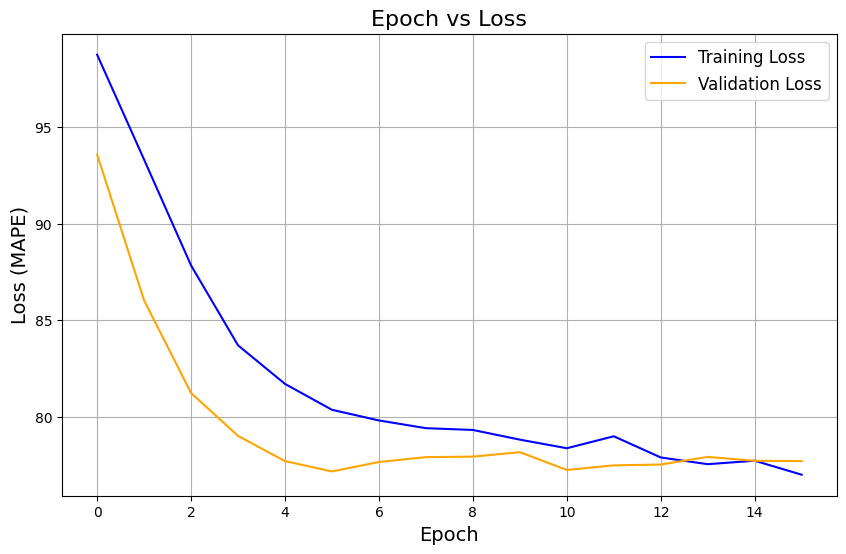

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Data.csv")

# Feature Engineering: Add lag features and moving averages
def create_features(data, n_lags=3, moving_avg_periods=[3, 6]):
    feature_data = data.copy()
    for lag in range(1, n_lags + 1):
        feature_data[f'Lag_{lag}'] = feature_data.iloc[:, -lag-1]
    for period in moving_avg_periods:
        feature_data[f'MA_{period}'] = feature_data.iloc[:, -period:].mean(axis=1)
    return feature_data

# Extract sales data and add features
sales_data = data.iloc[:, 3:]  # Sales columns (Apr-18 to May-21)
enhanced_sales_data = create_features(sales_data)

# Encode categorical features
metadata = data.iloc[:, :3]
le_region = LabelEncoder()
le_sku = LabelEncoder()
metadata['Region'] = le_region.fit_transform(metadata['Region'])
metadata['SKU id'] = le_sku.fit_transform(metadata['SKU id'])

# Combine features with metadata
enhanced_data = pd.concat([metadata, enhanced_sales_data], axis=1)

# Separate the target column (May-21)
feature_columns = enhanced_data.columns[3:-1]  # Exclude metadata and target
target_column = 'May-21'
X = enhanced_data[feature_columns].values
y = enhanced_data[target_column].values.reshape(-1, 1)  # Reshape for consistency

# Reshape X for GRU
X = X.reshape(X.shape[0], 1, X.shape[1])

# Build the GRU model
model = Sequential([
    GRU(32, activation='tanh', return_sequences=True, input_shape=(1, X.shape[2])),
    Dropout(0.3),
    GRU(64, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

# Use Adam optimizer with custom learning rate
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mape')

# Train the model and track history
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Generate predictions for June 2021
predictions = model.predict(X)  # Predictions without scaling

# Prepare the submission file
enhanced_data['Jun-21'] = predictions
submission = enhanced_data[['Warehouse id', 'Region', 'SKU id', 'Jun-21']]

# Decode the categorical features
submission['Region'] = le_region.inverse_transform(submission['Region'])
submission['SKU id'] = le_sku.inverse_transform(submission['SKU id'])

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file generated: submission.csv")

# Plot the epoch vs loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Epoch vs Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (MAPE)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
################################################################################

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Data.csv")

# Feature Engineering: Add lag features and moving averages
def create_features(data, n_lags=3, moving_avg_periods=[3, 6]):
    feature_data = data.copy()
    for lag in range(1, n_lags + 1):
        feature_data[f'Lag_{lag}'] = feature_data.iloc[:, -lag-1]
    for period in moving_avg_periods:
        feature_data[f'MA_{period}'] = feature_data.iloc[:, -period:].mean(axis=1)
    return feature_data

# Extract sales data and add features
sales_data = data.iloc[:, 3:]  # Sales columns (Apr-18 to May-21)
enhanced_sales_data = create_features(sales_data)

# Encode categorical features
metadata = data.iloc[:, :3]
le_region = LabelEncoder()
le_sku = LabelEncoder()
metadata['Region'] = le_region.fit_transform(metadata['Region'])
metadata['SKU id'] = le_sku.fit_transform(metadata['SKU id'])

# Combine features with metadata
enhanced_data = pd.concat([metadata, enhanced_sales_data], axis=1)

# Separate the target column (May-21)
feature_columns = enhanced_data.columns[3:-1]  # Exclude metadata and target
target_column = 'May-21'
X = enhanced_data[feature_columns].values
y = enhanced_data[target_column].values.reshape(-1, 1)  # Reshape for consistency

# Reshape X for GRU
X = X.reshape(X.shape[0], 1, X.shape[1])

# Build the GRU model
model = Sequential([
    GRU(32, activation='tanh', return_sequences=True, input_shape=(1, X.shape[2])),
    Dropout(0.3),
    GRU(64, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

# Use Adam optimizer with custom learning rate
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mape')

# Train the model and track history
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X, y, epochs=70, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Generate predictions for June 2021
predictions = model.predict(X)  # Predictions without scaling

# Prepare the submission file
enhanced_data['Jun-21'] = predictions
submission = enhanced_data[['Warehouse id', 'Region', 'SKU id', 'Jun-21']]

# Decode the categorical features
submission['Region'] = le_region.inverse_transform(submission['Region'])
submission['SKU id'] = le_sku.inverse_transform(submission['SKU id'])

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file generated: submission.csv")

# Plot the epoch vs loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Epoch vs Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (MAPE)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()